In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
'''
- datetime - 시간별 날짜 + 타임스탬프
- 계절 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- 휴일 - 해당 날이 공휴일로 간주되는지 여부
- 근무일 - 그 날이 주말도 휴일도 아닌지의 여부
- 풍상을 일으키다
    - 1: 맑음, 구름 거의 없음, 부분적으로 흐림, 부분적으로 흐림
    - 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름 몇 개, 안개
    - 3: 가벼운 눈, 가벼운 비 + 뇌우 + 산란운, 가벼운 비 + 산란운
    - 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
- 섭씨 온도
- 온도 - 섭씨 단위의 "느낌" 온도
- 습도 - 상대습도
- 풍속 - 풍속
- 캐주얼 - 등록되지 않은 사용자 임대 시작 수
- registered - 시작된 등록된 사용자 대여 수
- 개수 - 총 임대 수
'''

In [219]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("train.csv")

In [4]:
submission = pd.read_csv("sampleSubmission.csv")

## 데이터 구조 확인

In [108]:
print(train.shape)
print(test.shape)
print(submission.shape)

(10886, 12)
(10886, 12)
(6493, 2)


In [109]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [110]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 데이터 자료 분석 및 필요에 의한 전처리 

In [10]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 1. datetime 분석 및 정리

#### datetime 중 년, 월, 일이 명시 되어 있지만 "일" 날짜를 가르키는 날은 19일 밖에 없으며 분,초는 나타내지 않는걸 확인

In [220]:
train[train["datetime"].between('2011-01-01', '2011-01-31')].tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59
430,2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28


#### 오브젝트로 이루어진 날짜와 시간 형태를 데이트타임으로 변경 후 년/월/시 기준으로 나누었고 일,분,초는 제외함

In [221]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour

In [222]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2


#### holiday = 공휴일, workingday = 평일로 임의적으로 요일을 표시하여 요일별 자전거 총 대여량 검사

In [223]:
train["day"] = train['datetime'].dt.day_name()

In [224]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22,Wednesday


In [227]:
train["day"].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day, dtype: int64

In [225]:
train.groupby("day", as_index = False)["count"].mean().sort_values("count", ascending = False)

,day,count
0,Friday,197.844343
4,Thursday,197.296201
2,Saturday,196.665404
1,Monday,190.390716
5,Tuesday,189.723847
6,Wednesday,188.411348
3,Sunday,180.839772


#### 시즌별/년도별/월별/시간별 총 자전거 대여량 수 비교

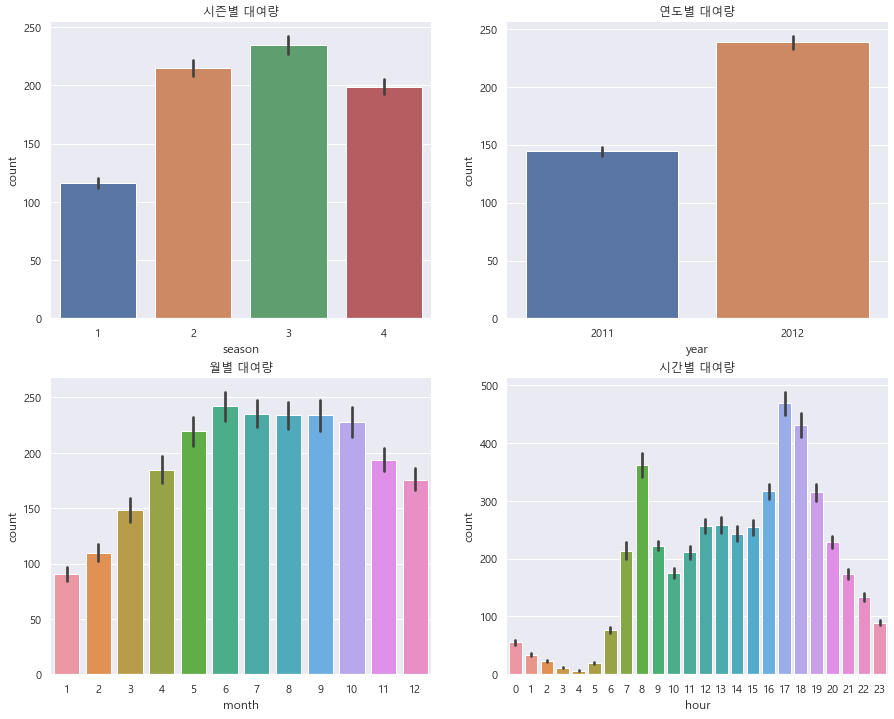

In [253]:
plt.rcParams['font.family'] = 'Malgun Gothic'
f,axes = plt.subplots(2,2,figsize = (15,12))

sns.despine(left = True)

sns.barplot(x = "season" , y = 'count' , data = train, ax =  axes[0,0]) # 1번째 record의 자료
sns.barplot(x = "year" , y = 'count' , data = train, ax = axes[0,1])

sns.barplot(x = "month", y = "count", data=train, ax = axes[1,0]) # 2번째 record의 자료
sns.barplot(x = "hour", y = 'count', data = train, ax = axes[1,1])

# 텍스트
axes[0,0].set(title="시즌별 대여량")
axes[0,1].set(title="연도별 대여량")
axes[1,0].set(title="월별 대여량")
axes[1,1].set(title="시간별 대여량");

#### 위에서 날짜가 19일 까지 밖에 없어서 잘랐기 때문에 요일 별, 공휴일 별, 평일별 자전거 대여량 비교

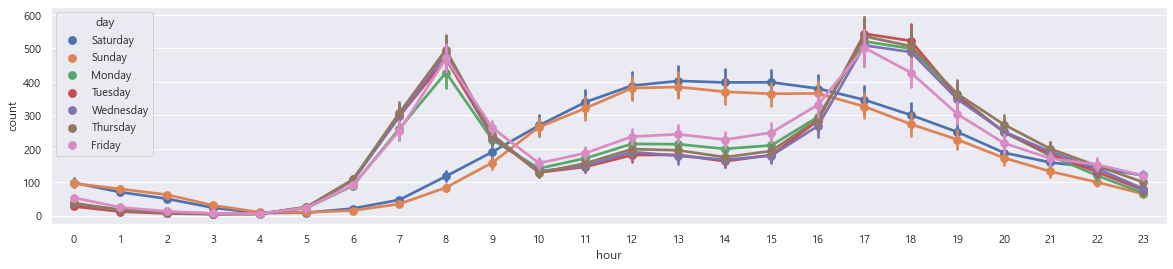

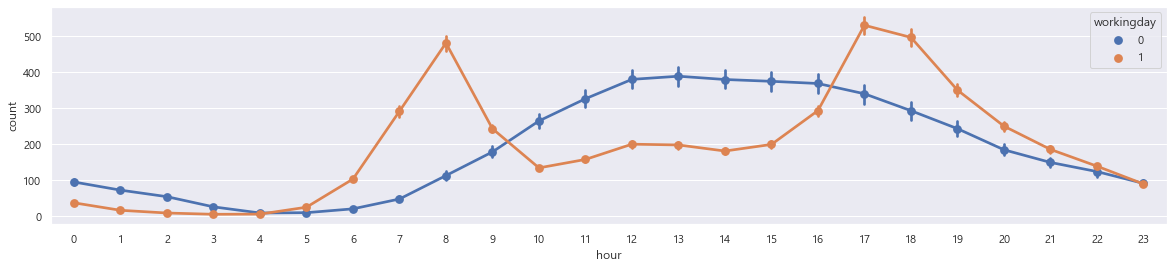

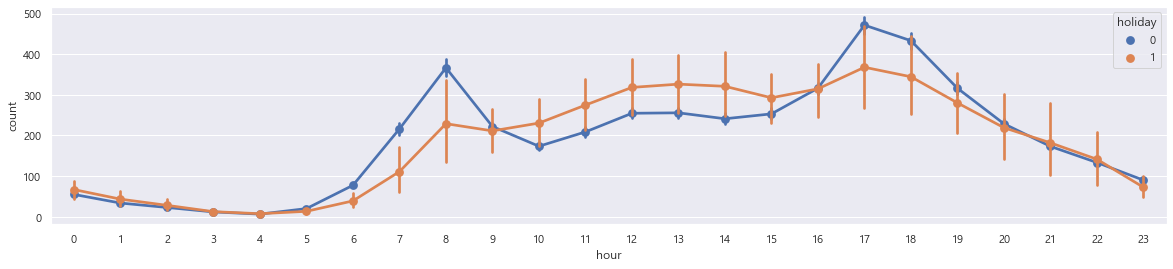

In [256]:
for i in ["day", "workingday", "holiday"] :
    plt.figure(figsize = (20,4))
    sns.pointplot(x = 'hour', y = 'count', data = train, hue = i)
    plt.show()

#### season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* 1. 가을에 총 대여 추이량이 가장 크다
* 2. 2011년 보다 2012년에 자전거 이용률이 더 많다 
* 3. 월별은 11 ~ 4월을 제외한 나머지는 비슷한데 아마도 기온에 따른 영향을 많이 받았을듯
* 4. 시간은 8시, 17시,18시가 가장 큰 값을 나타내는 것을 보니 출근 / 퇴근 시간대에 이용률이 크다

> 

##### 시간별 비회원, 회원, 총 대여수 비교

In [27]:
hourby_count = train.groupby("hour")[["registered", "casual", "count"]].mean()

In [30]:
hourby_count.head(3)

,registered,casual,count
hour,,,
0,44.826374,10.312088,55.138462
1,27.345815,6.513216,33.859031
2,18.080357,4.819196,22.899554


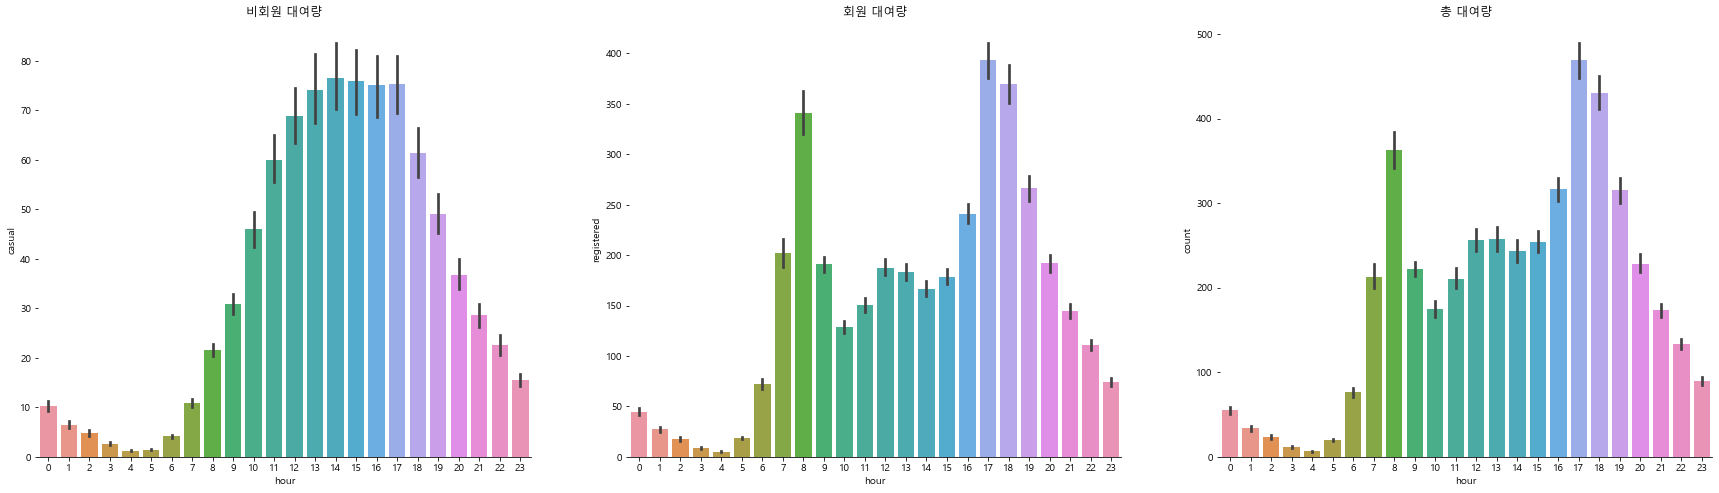

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'
f,axes = plt.subplots(1,3,figsize = (30,8))
sns.despine(left = True)
x = 'hour'

sns.barplot(x =x, y = 'casual' , data = train, ax =  axes[0])
sns.barplot(x =x, y = 'registered' ,data = train,ax = axes[1])
sns.barplot(x =x, y = 'count' , data = train,ax = axes[2])

axes[0].set(title="비회원 대여량")
axes[1].set(title="회원 대여량")
axes[2].set(title="총 대여량");

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
 16  day         10886 non-